## Reference: 
https://365datascience.com/tutorials/python-tutorials/import-data-python/ #Data from Yahoo Finance \
https://pypi.org/project/yfinance/               #Documentation on YFinance \
https://investpy.readthedocs.io/_info/usage.html #Data from Investing.com

CONCEPTS:\
https://www.askpython.com/python/examples/optimization-in-python #Optimization w/ Python \
https://www.machinelearningplus.com/time-series/time-series-analysis-python/ #Time Series in Python

## Project: Backtesting Trading Strategy Based on Exchange Rate & RSI

In [9]:
# Importing the necessary package 
# Make sure to pip install it in Anaconda, if you don't have it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance 
# Ignoring warning messages
import warnings 
warnings.filterwarnings("ignore")

In [10]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "1994-01-07", #The starting date of our data set
                              end = "2019-09-27", #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1d", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
                              group_by = 'ticker', #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period. 
                              treads = True) #Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [11]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()
print(df_comp)

                  ^GDAXI                                            \
                    Open          High           Low         Close   
Date                                                                 
1994-01-07   2218.959961   2227.639893   2201.820068   2224.949951   
1994-01-10   2231.840088   2238.010010   2222.000000   2225.000000   
1994-01-11   2225.429932   2235.610107   2225.179932   2228.100098   
1994-01-12   2227.120117   2227.790039   2182.060059   2182.060059   
1994-01-13   2171.500000   2183.709961   2134.100098   2142.370117   
...                  ...           ...           ...           ...   
2019-09-23  12432.299805  12441.019531  12264.139648  12342.330078   
2019-09-24  12368.959961  12375.309570  12307.150391  12307.150391   
2019-09-25  12250.080078  12261.059570  12141.820312  12234.179688   
2019-09-26  12227.769531  12313.150391  12223.290039  12288.540039   
2019-09-27           NaN           NaN           NaN           NaN   

                   

In [4]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close


In [5]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices


In [6]:
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']


In [7]:
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values

In [8]:
print(df_comp.head())
print(df_comp.tail())

                   spx          dax         ftse        nikkei
                                                              
Date                                                          
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
1994-01-14  474.910004  2151.050049  3400.600098  18973.699219
                    spx           dax         ftse        nikkei
                                                                
Date                                                            
2019-09-23  2991.780029  12342.330078  7326.100098  22079.089844
2019-09-24  2966.600098  12307.150391  7291.399902  22098.839844
2019-09-25  2984.870117  12234.179688  7290.000000  22020.150391
2019-09-26  2977.620117  12288.540039  7351.100098  22048.240234
2019-09-27  2977.620117  12288.540039  73

In [9]:
raw_data = yfinance.download (tickers = "^GSPC, ^KS11", #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "1995-06-30", #The starting date of our data set
                              end = "2022-5-27", #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1wk", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
                               #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period. 
                              treads = True) #Whether to use threads for mass downloading. 

[*********************100%***********************]  2 of 2 completed


In [7]:
y = raw_data.copy()
print(y)

NameError: name 'raw_data' is not defined

In [11]:
x = y.dropna(axis = 0, how = 'any')
print(x)

                  Close                      High                       Low  \
                  ^GSPC        ^KS11        ^GSPC        ^KS11        ^GSPC   
Date                                                                          
1996-12-09   728.640015   689.070007   753.429993   709.479980   721.969971   
1996-12-16   748.869995   700.869995   755.409973   703.510010   716.690002   
1996-12-23   756.789978   651.219971   758.750000   697.119995   743.280029   
1996-12-30   748.030029   653.789978   759.200012   655.700012   729.549988   
1997-01-06   759.500000   648.690002   759.650024   653.590027   742.179993   
...                 ...          ...          ...          ...          ...   
2022-04-25  4131.930176  2695.050049  4308.450195  2696.100098  4124.279785   
2022-05-02  4123.339844  2644.510010  4307.660156  2702.100098  4062.510010   
2022-05-09  4023.889893  2604.239990  4081.270020  2642.750000  3858.870117   
2022-05-16  3901.360107  2639.290039  4090.719971  2

## Retrieving Data from investing.com ##

In [2]:
import investpy

In [5]:
search_result = investpy.search_quotes(text='USD/KRW', products=['currencies'],
                                        n_results=1)
print(search_result)
print(type(search_result))

{"id_": 650, "name": "US Dollar Korean Won", "symbol": "USD/KRW", "country": "south korea", "tag": "/currencies/usd-krw", "pair_type": "currencies", "exchange": ""}
<class 'investpy.utils.search_obj.SearchObj'>


In [6]:
recent_data = search_result.retrieve_recent_data()
print(recent_data)
historical_data = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='01/01/2020')
print(historical_data.head())

               Open     High      Low    Close  Change Pct
Date                                                      
2022-06-17  1288.57  1296.67  1282.29  1291.26        0.24
2022-06-20  1291.50  1296.26  1287.91  1291.54        0.02
2022-06-21  1292.55  1294.29  1287.34  1291.72        0.01
2022-06-22  1292.08  1305.26  1290.69  1297.58        0.45
2022-06-23  1297.69  1307.92  1296.32  1299.81        0.17
2022-06-24  1300.14  1302.32  1288.11  1288.89       -0.84
2022-06-27  1289.29  1293.35  1280.58  1286.31       -0.20
2022-06-28  1286.63  1293.00  1281.46  1292.06        0.45
2022-06-29  1292.43  1302.80  1289.34  1301.90        0.76
2022-06-30  1301.96  1304.24  1287.35  1287.51       -1.11
2022-07-01  1288.05  1302.81  1287.80  1298.67        0.87
2022-07-04  1298.92  1300.16  1292.05  1295.87       -0.22
2022-07-05  1296.06  1315.57  1293.68  1308.95        1.01
2022-07-06  1309.09  1311.02  1302.81  1304.79       -0.32
2022-07-07  1305.14  1308.74  1295.90  1297.62       -0.

23/07/2022
               Open     High      Low    Close Currency
Date                                                   
1990-01-07   685.60   685.60   685.60   685.60      KRW
1990-01-14   687.20   687.20   687.20   687.20      KRW
1990-01-21   687.80   687.80   687.80   687.80      KRW
1990-01-28   690.10   690.10   690.10   690.10      KRW
1990-02-04   691.80   691.80   691.80   691.80      KRW
...             ...      ...      ...      ...      ...
2022-06-19  1291.50  1307.92  1287.34  1288.89      KRW
2022-06-26  1289.29  1304.24  1280.58  1298.67      KRW
2022-07-03  1298.92  1315.57  1292.05  1294.68      KRW
2022-07-10  1294.79  1329.58  1294.62  1317.74      KRW
2022-07-17  1319.15  1322.13  1302.35  1310.01      KRW

[1698 rows x 5 columns]
1698


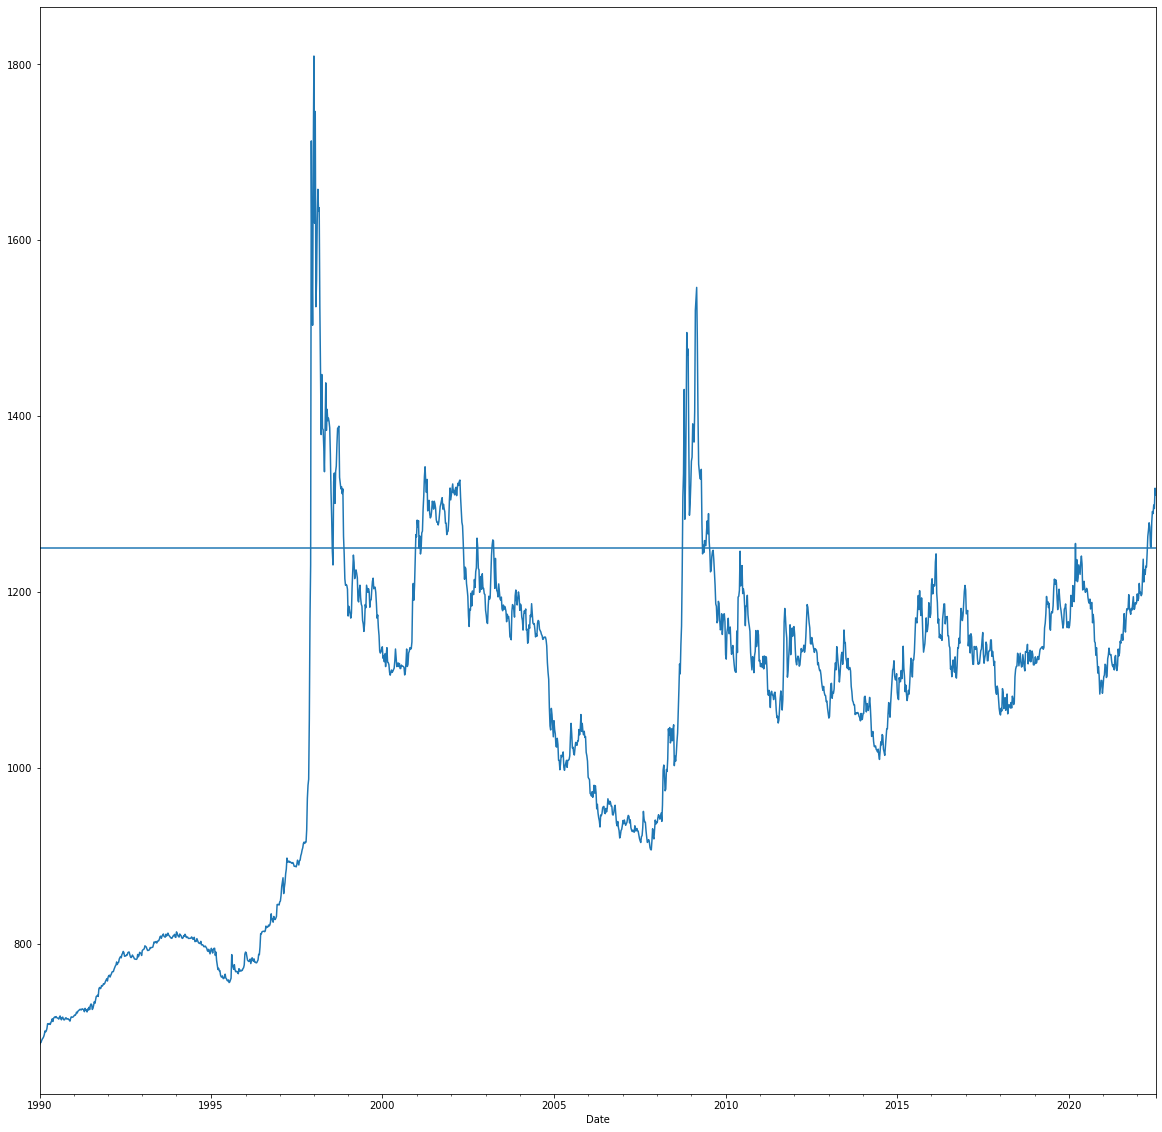

In [3]:
from datetime import datetime
now = datetime.now()
now = now.strftime("%d/%m/%Y")
print(now)
intvl = "Weekly"

#KRW/USD Data
z = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW',
                                                from_date='01/01/1990', to_date=str(now), 
                                                interval = intvl)
print(z)
plt.figure(figsize=(20, 20))
z.Close.plot()
plt.axhline(1250)

print(len(z.Close))

               Open     High      Low    Close      Volume Currency
Date                                                               
2021-10-17  3017.48  3047.24  2990.44  3006.16  4035038976      KRW
2021-10-24  3001.10  3051.65  2965.40  2970.68  3127318016      KRW
2021-10-31  2984.18  3034.30  2953.96  2969.27  3119932928      KRW
2021-11-07  2965.36  2987.28  2903.72  2968.80  3078501120      KRW
2021-11-14  2989.68  3011.88  2937.53  2971.02  2959275008      KRW
2021-11-21  2983.38  3018.01  2930.31  2936.44  2803397888      KRW
2021-11-28  2906.15  2975.44  2822.73  2968.33  3413093120      KRW
2021-12-05  2954.82  3036.13  2932.49  3010.23  2474566912      KRW
2021-12-12  3019.67  3043.83  2973.00  3017.73  2244920064      KRW
2021-12-19  3001.33  3025.77  2955.90  3012.43  2271704064      KRW
2021-12-26  3013.94  3020.29  2975.74  2977.65  2089277952      KRW
2022-01-02  2998.32  3010.77  2915.38  2954.89  3176936960      KRW
2022-01-09  2947.37  2982.14  2909.82  2921.92  

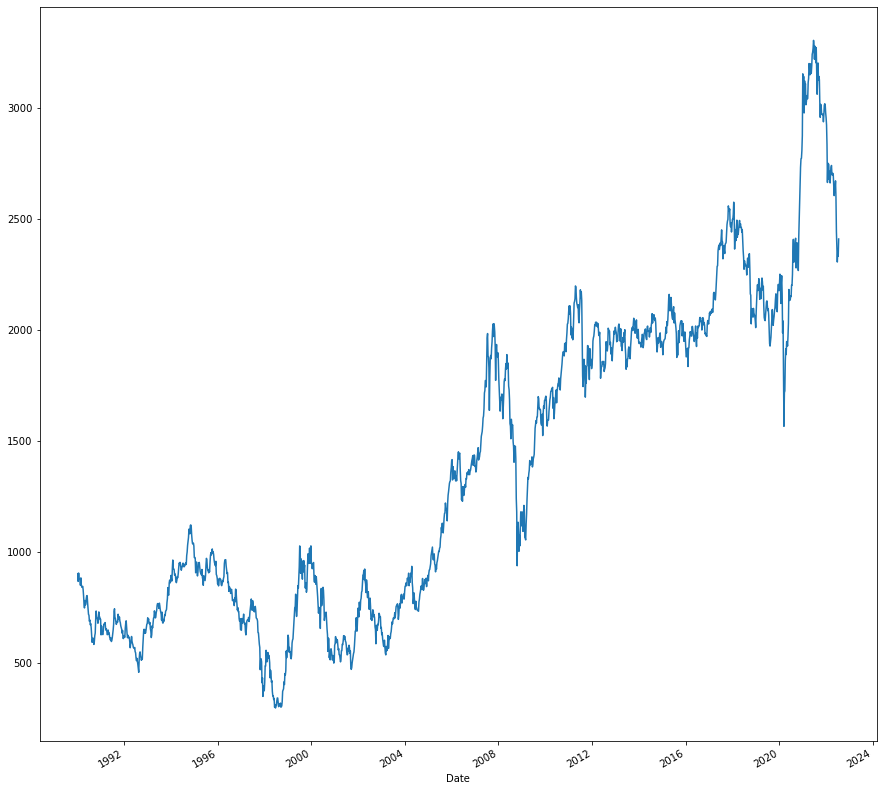

In [4]:
#KOSPI Data
kospi = investpy.indices.get_index_historical_data(index = 'kospi', country = 'South Korea', 
                                                   from_date='01/01/1990', to_date=str(now),
                                                   as_json=False, interval=intvl)
print(kospi.tail(40))
plt.figure(figsize=(15, 15))
kospi['Close'].plot()

print(len(kospi['Close']))
print(kospi.Close[1220])


## A. Trading Algorithm using Exchange Rate: 

Logic: 
1. Buy kospi at week's closing price when krw/usd is above a certain level (ex.1250 won) 
2. Sell Kospi at week's closing price when krw/usd is below a certain level (ex.1100 won) 

Execution methods: 
1. Buy and sell when exchange rate penetrates $\underline{in\ to}$ the desired levels (fast reaction to exchange rates) 
2. Buy and sell when exchange rate penetrates $\underline{out\ of}$ the desired levels (slow reaction to exchagne rates) 

Assumption: 
* Able to instantaneously buy at index/stock at the week's closing price after observing the week's closing level for Fx rate/RSI. 

In [5]:
#1. Penetrating 1250 from below (Korean Won weakens, i.e.fast move)
#   Penetrating 1100 from above (Korean Won strengthens, i.e.fast move))
def tradingalgo(ss,bs):
    #We observe the movement of USD/KRW weekly chart and buy Kospi when it shoots above 1250KRW, sell when it falls below 1100KRW
    #Economic Interpreation: Korean goods are relatively cheaper when exchange rate (KRW/USD) is high; 
    #i.e. one USD buys more Korean goods. When ex. rate is low, one USD buys less Korean goods, thus reducing the attractiveness of the 
    #Korean goods relative to US dollars. 
    holdings = []
    date = []
    returns = []
    x = z.Close 
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        if a<bs and b>=bs:
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(z.Close.index[i])
        elif a>ss and b<=ss:
            if len(holdings)%2==1:
                holdings.append(kospi.Close[i])
                date.append(z.Close.index[i])
                r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
                returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1235
sell = 1100
tradingalgo(sell,buy)

Date: [Timestamp('1997-12-07 00:00:00'), Timestamp('2004-11-14 00:00:00'), Timestamp('2008-10-05 00:00:00'), Timestamp('2011-03-27 00:00:00'), Timestamp('2016-02-21 00:00:00'), Timestamp('2017-11-12 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2022-03-06 00:00:00')]
Holdings: [350.68, 867.03, 1241.47, 2121.01, 1920.16, 2544.33, 1717.73, 2770.06, 2707.02]
Returns: [2.4724250028516024, 1.7084665759140374, 1.3250614532122322, 1.6126282943186647]
Total return: 9.026095189972606


In [6]:
#2 Penetrating 1250 from above (Weak Korean Won strengthens, i.e.slow move)
#  Penetrating 1100 from below (Strong Korean Won weakens, i.e.slow move)
def tradingalgo_1(ss,bs):
    #We observe the movement of USD/KRW weekly chart and buy Kospi when it shoots above 1250KRW, sell when it falls below 1100KRW
    #Economic Interpreation: Korean goods are relatively cheaper when exchange rate (KRW/USD) is high; 
    #i.e. one USD buys more Korean goods. When ex. rate is low, one USD buys less Korean goods, thus reducing the attractiveness of the 
    #Korean goods relative to US dollars. 
    holdings = []
    date = []
    returns = []
    x = z.Close 
    b_sig = []
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        if a>=bs and b<bs:
            b_sig.append(z.Close.index[i])
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(z.Close.index[i])
        elif a<=ss and b>ss:
            if len(holdings)%2==1:
                holdings.append(kospi.Close[i])
                date.append(z.Close.index[i])
                r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
                returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    print(b_sig)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1235
sell = 1100
tradingalgo_1(sell,buy)

Date: [Timestamp('1998-07-26 00:00:00'), Timestamp('2008-08-31 00:00:00'), Timestamp('2009-07-26 00:00:00'), Timestamp('2011-09-11 00:00:00'), Timestamp('2016-02-28 00:00:00'), Timestamp('2018-06-10 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2021-01-10 00:00:00'), Timestamp('2022-03-13 00:00:00')]
Holdings: [343.33, 1404.38, 1557.29, 1840.1, 1955.63, 2357.22, 1725.44, 3140.63, 2729.98]
Returns: [4.0904668977368726, 1.18160394017813, 1.205350705399283, 1.8201907919139466]
[Timestamp('1998-07-26 00:00:00'), Timestamp('1998-11-29 00:00:00'), Timestamp('1999-03-07 00:00:00'), Timestamp('2002-05-19 00:00:00'), Timestamp('2002-10-20 00:00:00'), Timestamp('2003-04-06 00:00:00'), Timestamp('2003-04-27 00:00:00'), Timestamp('2009-07-26 00:00:00'), Timestamp('2009-09-06 00:00:00'), Timestamp('2010-06-13 00:00:00'), Timestamp('2016-02-28 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-04-05 00:00:00'), Timestamp('2020-05-24 00:00:00'), Timestamp('2022-03-13 00:00:00')]

In [81]:
#2 Penetrating 1250 from above (Weak Korean Won strengthens, i.e.slow move)
#  Sell in first week of May the year after buy. 
def tradingalgo_2(ss,bs):
    #We observe the movement of USD/KRW weekly chart and buy Kospi when it shoots above 1250KRW, sell when it falls below 1100KRW
    #Economic Interpreation: Korean goods are relatively cheaper when exchange rate (KRW/USD) is high; 
    #i.e. one USD buys more Korean goods. When ex. rate is low, one USD buys less Korean goods, thus reducing the attractiveness of the 
    #Korean goods relative to US dollars. 
    holdings = []
    date = []
    returns = []
    x = z.Close 
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        hi = z.Close.index[i]
        if a>=bs and b<bs:
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(hi)
                tt = hi
                yy = int(tt.strftime('%Y'))
        if len(holdings)%2==1 and int(hi.strftime('%Y')) == yy+1 and int(hi.strftime('%m')) == 5:
            holdings.append(kospi.Close[i])
            date.append(hi)
            r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
            returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1250
sell = 1100
tradingalgo_2(sell,buy)

Date: [Timestamp('1998-07-24 00:00:00'), Timestamp('1999-05-03 00:00:00'), Timestamp('2001-02-02 00:00:00'), Timestamp('2002-05-01 00:00:00'), Timestamp('2002-05-20 00:00:00'), Timestamp('2003-05-01 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2010-05-03 00:00:00'), Timestamp('2010-05-27 00:00:00'), Timestamp('2011-05-02 00:00:00'), Timestamp('2020-03-24 00:00:00'), Timestamp('2021-05-03 00:00:00')]
Holdings: [730.58, 481.04, 1013.65, 508.35, 585.6, 844.67, 1634.53, 1210.26, 1192.44, 1627.43, 1648.01, 2004.68, 2249.37, 2962.17]
Returns: [0.6584357633660927, 0.5015044640655059, 1.4424009562841529, 0.7404330296782562, 1.3647898426755225, 1.216424657617369, 1.3168887288440765]
Total return: 0.7710101184680264


### Interpreation: 

Trading strategy that incorpiorates penetrating out of the buy & sell levels yield higher returns. \
Why? 

### A.1 Optimizing Parameter

In [19]:
import math 
print(z)
y = z.copy()
del y['Open']
del y['High']
del y['Low']
del y['Currency']

y['kospi'] = kospi.Close

for i in range(len(y)):
    if math.isnan(y.kospi[i]) ==True or math.isnan(y.Close[i]) ==True:
        print(i)
        
print(y.iloc[1447])

y = y.dropna(axis = 0, how = 'any')
print(y)

print(kospi)



               Open     High      Low    Close Currency
Date                                                   
1990-01-07   685.60   685.60   685.60   685.60      KRW
1990-01-14   687.20   687.20   687.20   687.20      KRW
1990-01-21   687.80   687.80   687.80   687.80      KRW
1990-01-28   690.10   690.10   690.10   690.10      KRW
1990-02-04   691.80   691.80   691.80   691.80      KRW
...             ...      ...      ...      ...      ...
2022-05-22  1270.41  1272.97  1248.85  1251.99      KRW
2022-05-29  1251.10  1255.04  1234.43  1250.58      KRW
2022-06-05  1251.86  1283.85  1248.23  1279.32      KRW
2022-06-12  1279.43  1296.77  1277.06  1291.26      KRW
2022-06-19  1291.50  1307.89  1287.82  1288.89      KRW

[1694 rows x 5 columns]
1447
Close    1145.32
kospi        NaN
Name: 2017-10-01 00:00:00, dtype: float64
              Close    kospi
Date                        
1990-01-07   685.60   903.11
1990-01-14   687.20   868.20
1990-01-21   687.80   905.75
1990-01-28   690.10  

[ 685.6   687.2   687.8  ... 1279.32 1291.26 1288.89]
<class 'numpy.ndarray'>
(1693, 1)


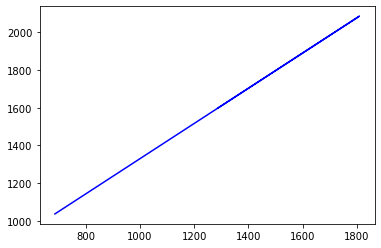

In [20]:
'''x = np.linspace(0, 1, 10)
print(x)
print(x.shape)
hi = x.reshape(-1,1)
print(type(hi))
print(hi.shape)
print('hi' ,hi)'''
###############################################

m = y.Close.to_numpy() 
print(m)
print(type(m))
fx = m.reshape(-1, 1)
print(fx.shape)
mm = y.kospi.to_numpy() 
kos = mm.reshape(-1, 1)
###############################################

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(fx,kos)
plt.plot(m, model.predict(fx), 'b-', label = 'Prediction')

In [21]:
#Optimizing parameters for method 2. 
print(max(z.Close))
zzz = z.Close.index
print(z.Close.idxmax())
print(z.iloc[417])

x_line = np.arange(min(z['Close']), max(z['Close']), 1)
print(x_line)

1809.0
1998-01-04 00:00:00
Open        1703
High        1853
Low         1653
Close       1809
Currency     KRW
Name: 1998-01-04 00:00:00, dtype: object
[ 685.6  686.6  687.6 ... 1806.6 1807.6 1808.6]


## B. Trading Algo. Using Ex. Rate & RSI

In [22]:
#Data Collecting for RSI 
n = 14 #RSI Look-back period 
hh = investpy.indices.get_index_historical_data(index = 'kospi', country = 'South Korea', 
                                                   from_date='01/01/1998', to_date='01/01/1999',
                                                   as_json=False, interval='Weekly')
kk = hh.Close
rsi_data = pd.concat([kk,kospi.Close])

1693


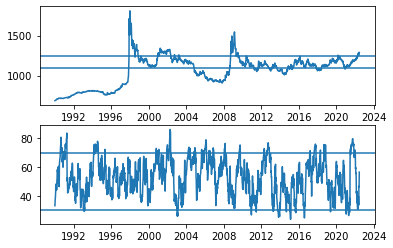

In [23]:
def rsi(step):
    rsi = []
    gain = []
    loss = []
    ag = []
    al = []
    #step 1
    for i in range(1,len(rsi_data)):
        r = (rsi_data[-i]-rsi_data[-i-1])
        if r>=0:
            gain.append(r)
            loss.append(0)
        elif r<0:
            loss.append(-1*r)
            gain.append(0)
    g = np.average(gain[0:14])
    ag.append(g)
    l = np.average(loss[0:14])
    al.append(l)
    for j in range(len(gain[14:])):
        x = (gain[14+j]+13*ag[-1])/14
        ag.append(x)
        y = (loss[14+j]+13*al[-1])/14
        al.append(y)
    x = np.divide(ag,al)
    rsi = 100-100/(1+x)
    return rsi[-len(kospi):].tolist()

rsi = rsi(14)
fig, axes = plt.subplots(2,1)

axes[0].plot(z.index, z.Close)
axes[0].axhline(1250)
axes[0].axhline(1100)
axes[1].plot(kospi.index, rsi)
axes[1].axhline(30)
axes[1].axhline(70)
print(len(rsi))

In [24]:
def tradingalgo_rsi_fx(ss,bs,rsi_s,rsi_b):
    #buy sell w both fx and rsi 
    holdings = []
    date = []
    returns = []
    hi =[]
    x = z.Close 
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        if b>=bs and rsi[i] <rsi_b:
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(z.Close.index[i])
        elif b<=ss and rsi[i] > rsi_s:
            if len(holdings)%2==1:
                holdings.append(kospi.Close[i])
                date.append(z.Close.index[i])
                r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
                returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1230
sell = 1100
rsi_s = 65
rsi_b = 35
tradingalgo_rsi_fx(sell,buy,rsi_s,rsi_b)

Date: [Timestamp('2008-12-14 00:00:00'), Timestamp('2012-10-21 00:00:00'), Timestamp('2022-04-17 00:00:00')]
Holdings: [1180.97, 1891.43, 2695.05]
Returns: [1.601590218210454]
Total return: 1.601590218210454


In [25]:
def tradingalgo_rsi_fx_1(ss,bs,rsi_s,rsi_b):
    #buy sell w both fx and rsi 
    holdings = []
    date = []
    returns = []
    hi =[]
    x = z.Close 
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        if b>=bs and rsi[i-1] <rsi_b and rsi[i] >=rsi_b:
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(z.Close.index[i])
        elif b<=ss and rsi[i-1] > rsi_s and rsi[i] <= rsi_s:
            if len(holdings)%2==1:
                holdings.append(kospi.Close[i])
                date.append(z.Close.index[i])
                r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
                returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1230
sell = 1100
rsi_s = 65
rsi_b = 35
tradingalgo_rsi_fx_1(sell,buy,rsi_s,rsi_b)

Date: [Timestamp('2003-03-09 00:00:00'), Timestamp('2004-12-26 00:00:00'), Timestamp('2008-12-21 00:00:00'), Timestamp('2012-11-25 00:00:00'), Timestamp('2022-05-01 00:00:00')]
Holdings: [537.65, 895.92, 1117.86, 1932.9, 2604.24]
Returns: [1.666362875476611, 1.7291074016424242]
Total return: 2.8813203818087616


In [26]:
def tradingalgo_rsi_fx_2(ss,bs,rsi_s,rsi_b):
    #buy sell w both fx and rsi 
    holdings = []
    date = []
    returns = []
    hi =[]
    x = z.Close 
    for i in range(1,len(kospi.Close)):
        b = x[i]
        a = x[i-1]
        if b>=bs and rsi[i-1] <rsi_b and rsi[i] >=rsi_b:
            if len(holdings)%2==0:
                holdings.append(kospi.Close[i]) 
                date.append(z.Close.index[i])
        elif b<=ss:
            if len(holdings)%2==1:
                holdings.append(kospi.Close[i])
                date.append(z.Close.index[i])
                r = 1 + (holdings[-1] - holdings[-2])/holdings[-2]
                returns.append(r)
    print("Date:", date)
    print("Holdings:", holdings)
    print("Returns:", returns)
    tot_ret = np.prod(returns)
    return print("Total return:", tot_ret)

buy = 1230
sell = 1100
rsi_s = 65
rsi_b = 35
tradingalgo_rsi_fx_2(sell,buy,rsi_s,rsi_b)

Date: [Timestamp('2003-03-09 00:00:00'), Timestamp('2004-11-14 00:00:00'), Timestamp('2008-12-21 00:00:00'), Timestamp('2011-03-27 00:00:00'), Timestamp('2022-05-01 00:00:00')]
Holdings: [537.65, 867.03, 1117.86, 2121.01, 2604.24]
Returns: [1.612629033758021, 1.8973842878356864]
Total return: 3.0597769907601133
